<a href="https://colab.research.google.com/github/Suryaanugrah2001/-/blob/main/Analisis_Data_Penjualan_Penjualan_toko_roti_Prancis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Analisis Data Penjualan Penjualan toko roti Prancis**

In [27]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
plt.style.use('fivethirtyeight')
import seaborn as sns


In [28]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
from google.colab import files
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Bakery sales.csv")
data = pd.DataFrame(data)
data

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
...,...,...,...,...,...,...,...
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


In [30]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


In [31]:
data.describe()

,Unnamed: 0,ticket_number,Quantity
count,234005.000000,234005.000000,234005.000000
mean,255205.035854,219201.258738,1.538377
std,147501.625992,40053.223896,1.289603
min,0.000000,150040.000000,-200.000000
25%,127979.000000,184754.000000,1.000000
50%,254573.000000,218807.000000,1.000000
75%,382911.000000,253927.000000,2.000000
max,511395.000000,288913.000000,200.000000


Data Hilang

In [32]:
print(data.isna().sum())

Unnamed: 0       0
date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64


In [33]:
data.duplicated().sum()

0

In [34]:
data = data.drop_duplicates()
data.shape


(234005, 7)

In [35]:
# Ganti nama kolom
data = data.rename(columns = {'date' : 'Date',
                         'time' : 'Time',
                          'ticket_number' : 'Transaction_id',
                          'article' : 'Menu',
                          'unit_price' : 'Price'})


# Convert 'Menu' value to title case.
data['Menu'] = data['Menu'].str.title()


# Fix 'Quantity' and 'Price' values.
data = data.replace(to_replace = {'Quantity' : {'.' : ' '},
                              'Price' : {'€' : ' ' , ',' : '.' }}, regex=True)


# Convert 'Quantity', 'Price', 'Menu' and 'Transaction_id' types.
data = data.astype({'Quantity' : 'int',
                'Price' : 'float',
                'Transaction_id' : 'int',
                'Menu' : 'str'})

In [36]:
# Buat kolom 'Pendapatan', untuk mengetahui pendapatan toko roti. dengan rumus data kuantitas*harga
data['Revenue'] = data['Quantity'] * data['Price']

In [37]:
# ubah tipe data tanggal dan waktu dari data objek, menjadi tipe data waktu
data['Date'] = pd.to_datetime(data['Date'])

# Kelompokkan kolom 'Tanggal' menjadi kolom 'Hari_Hari', 'Hari', Bulan' dan 'Tahun'.
data['Week_day'] = data['Date'].dt.weekday
data['Day'] = data['Date'].dt.day
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.to_period('M')
data['Quarter'] = data['Date'].dt.to_period('Q')

# Ubah kolom 'Week_day' menjadi nama hari.
data = data.replace(to_replace = {'Week_day' : {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday',
                                            3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday',
                                            6 : 'Sunday'}}, regex=True)

In [38]:
# kelompokan kolom 'Waktu' dan ubah menjadi siang hari
data['Day_time'] = pd.to_datetime(data['Time']).dt.hour

# Create function from hour to day time
def day_time (Day_time):
    if Day_time < 12:
        return 'Morning'
    elif Day_time < 17:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply function to the new column
data['Day_time'] = data.Day_time.apply(day_time)
data.head(1)

,Unnamed: 0,Date,Time,Transaction_id,Menu,Quantity,Price,Revenue,Week_day,Day,Year,Month,Quarter,Day_time
0,0,2021-01-02,08:38,150040,Baguette,1,0.9,0.9,Saturday,2,2021,2021-01,2021Q1,Morning


In [39]:
# Sorting certain columns to see an overview of data from the smallest to the largest value
data.sort_values(by=['Menu', 'Quantity', 'Price', 'Revenue'])

,Unnamed: 0,Date,Time,Transaction_id,Menu,Quantity,Price,Revenue,Week_day,Day,Year,Month,Quarter,Day_time
19904,43541,2021-03-18,12:59,161853,.,1,0.0,0.0,Thursday,18,2021,2021-03,2021Q1,Afternoon
24959,54650,2021-04-04,09:53,164878,.,1,0.0,0.0,Sunday,4,2021,2021-04,2021Q2,Morning
33569,73667,2021-04-27,16:48,170079,.,1,0.0,0.0,Tuesday,27,2021,2021-04,2021Q2,Afternoon
15360,33726,2021-03-04,12:32,159219,.,2,0.0,0.0,Thursday,4,2021,2021-03,2021Q1,Afternoon
61792,135091,2021-07-10,13:25,186662,.,2,0.0,0.0,Saturday,10,2021,2021-07,2021Q3,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229734,501877,2022-09-17,07:33,286289,Vik Bread,5,2.7,13.5,Saturday,17,2022,2022-09,2022Q3,Morning
233746,510827,2022-09-30,09:55,288758,Vik Bread,5,2.7,13.5,Friday,30,2022,2022-09,2022Q3,Morning
64028,139768,2021-07-14,08:51,187882,Vik Bread,6,2.5,15.0,Wednesday,14,2021,2021-07,2021Q3,Morning
53307,116514,2021-06-19,18:28,181621,Vik Bread,10,2.5,25.0,Saturday,19,2021,2021-06,2021Q2,Evening


Pada kolom 'Menu' di atas, terdapat nilai titik (.) dan nilai nol (0) pada 'Harga'. Nilai-nilai ini dapat menyebabkan bias informasi dan kesalahan penafsiran. Oleh karena itu, kita perlu menghapus/menghilangkan nilai-nilai ini:

In [40]:
data = data[~data['Menu'].isin(['.'])].reset_index(drop = True)
data = data[~data['Price'].isin([0])].reset_index(drop = True)


Mengidentifikasi & Menghapus data pencilan/outlier

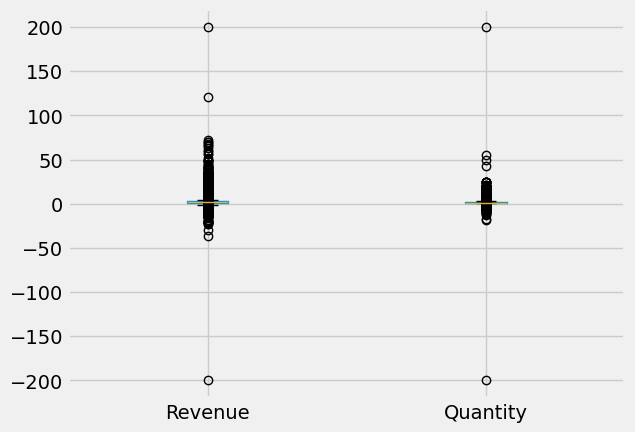

In [41]:
data.boxplot(column=['Revenue', 'Quantity'])
plt.show()

**Berdasarkan scatter plot di atas, terdapat dua jenis outlier; outlier global dan outlier kontekstual:**

1.   outlier global pada 'Pendapatan' dan 'Kuantitas' (≥100) mungkin terjadi karena kesalahan entri data karena nilainya cukup jauh dari data lainnya.
2.   outlier kontekstual, dilihat dari banyaknya lonjakan mendadak yang terjadi dalam kondisi yang sama untuk ‘Pendapatan’ dan ‘Kuantitas’

Dalam hal ini bisa saja terjadi karena adanya acara-acara khusus seperti hari raya, dimana banyak diadakan diskon atau promosi lainnya dan meningkatkan volume penjualan.
Oleh karena itu, saya akan menghilangkan nilai outlier global yang mungkin disebabkan oleh kesalahan entri data sambil tetap mempertahankan outlier kontekstual

Semua nilai nol pada 'Pendapatan' di atas **mungkin** dapat terjadi karena strategi promosi atau diskon (misalnya,hadiah untuk pelanggan setia/penawaran khusus untuk pelanggan pertama, dll.)
terdapat pula banyak nilai negatif dalam 'Kuantitas'. **Mungkin** hal ini terjadi karena kesalahan entri data. Dalam hal ini, pelanggan mungkin telah membatalkan atau mengembalikan menu tersebut. Jadi, nilai negatif ini harus dihilangkan dari kolom 'Kuantitas'

In [42]:
# hilangkan nilai negatif (df > 0)
data = data.loc[~((data['Quantity'] <= 0) | (data['Revenue'] <= 0))].reset_index(drop = True)

# hilangkan global outliers
data = data.loc[~(data['Revenue'] >= 100)].reset_index(drop = True)
data = data.loc[~(data['Quantity'] >= 100)].reset_index(drop = True)

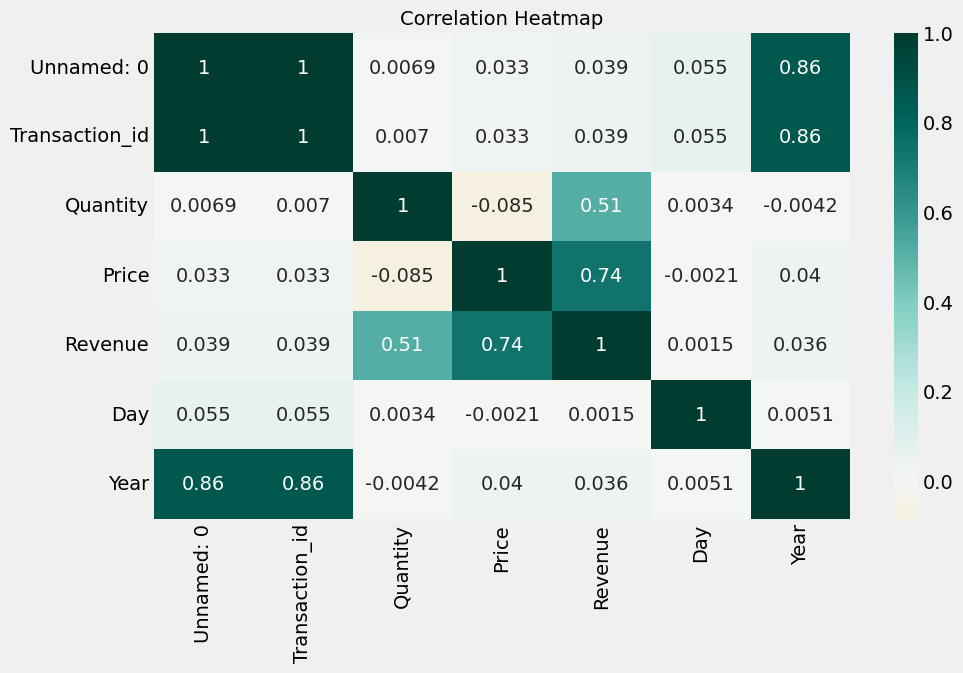

In [43]:
#plot uji korelasi
plt.figure(figsize = (10,6))
heatmap = sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='BrBG', center=0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14})
plt.show()





*   Kuantitas dan Pendapatan (0,51): Menunjukkan korelasi sedang. Ketika Kuantitas meningkat, Pendapatan juga cenderung meningkat.
*   Harga dan Pendapatan (0,74): Menunjukkan korelasi yang kuat. Ketika Harga meningkat, Pendapatan juga meningkat.
*   Kuantitas dan Harga (-0,085): Menunjukkan korelasi yang buruk/lemah. Kedua fitur tersebut hampir tidak berhubungan.





In [73]:
# menu terlaris
fig = px.treemap(data_frame=data,
                path=[px.Constant('<b> Menu Items'),
                      'Menu'],
                title = '<b> Item Menu Terlaris (2021 & 2022)',
                values= 'Quantity')

fig.data[0].textinfo = 'label+text+value'
fig.update_traces(root_color='lightgrey')
fig.update_layout(treemapcolorway = ['burlywood', 'cadetblue'],
                  margin = dict(t=50, l=20, r=20, b=20))
fig.layout.hovermode = False
fig.show()


# Most Profitable Menu Items
fig = px.treemap(data_frame=data,
                path=[px.Constant('<b> Menu Items'),
                      'Menu'],
                title = '<b> Item menu paling menguntungkan (2021 & 2022)',
                values='Revenue')

fig.data[0].textinfo = 'label+text+value'
fig.update_traces(root_color='lightgrey')
fig.update_layout(treemapcolorway = ['slateblue', 'peachpuff'],
                  margin = dict(t=50, l=20, r=20, b=20))
fig.layout.hovermode = False
fig.show()

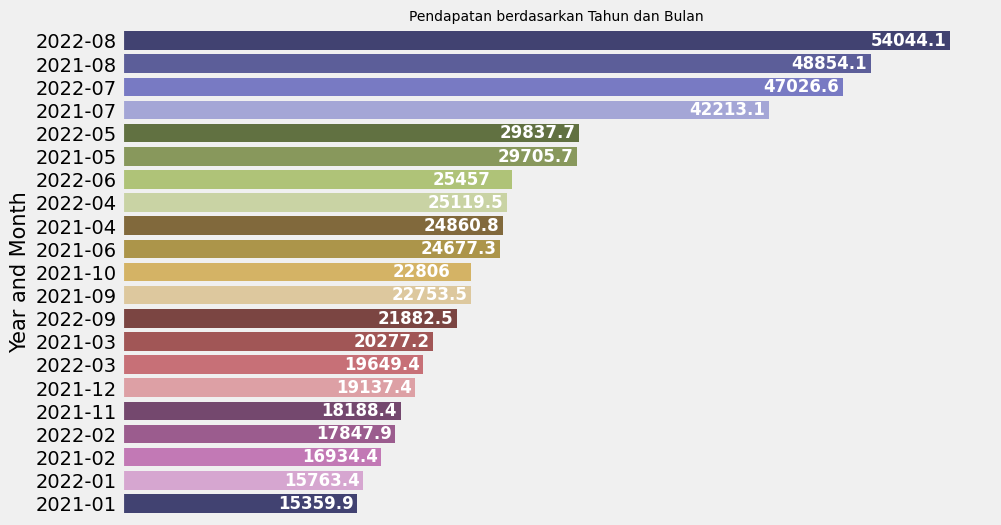

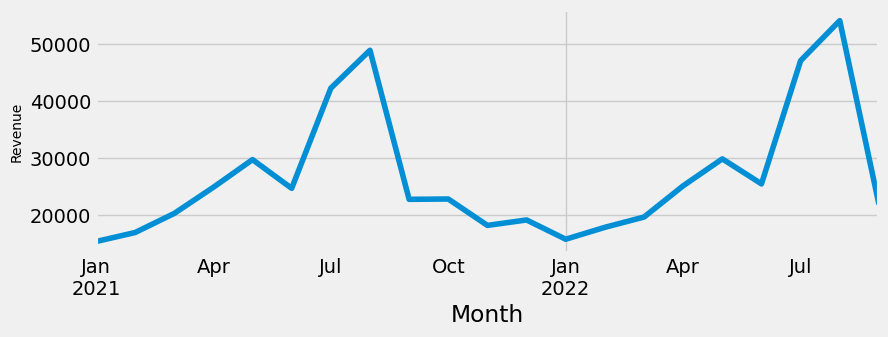

In [72]:
# pendapatan perbulan
rev_month = data.groupby(['Month'])['Revenue'].sum()\
                                            .reset_index()\
                                            .sort_values(by='Revenue', ascending=False)
fig = plt.figure(figsize = (10,6))
color = sns.color_palette('tab20b')
ax = sns.barplot(data=rev_month, x='Revenue', y='Month', palette=color, orient='h')

for i in ax.containers:
    ax.bar_label(i, padding=-57, color='white',
             fontsize=12, label_type='edge',
            fontweight='bold')
            # fmt='%.1f%%')

plt.ylabel('Year and Month', size=15)
plt.title('Pendapatan berdasarkan Tahun dan Bulan', size=10)
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
plt.show()

plt.figure(figsize = (9,3))
data.groupby(['Month'])['Revenue'].sum().plot()
plt.ylabel('Revenue', size=10)
plt.show()

bisa dilihat dari bar plot di atas, **Agustus dan Juni merupakan bulan tertinggi yang menghasilkan pendapatan**. Hal ini bisa terjadi karena perayaan hari nasional di Perancis diadakan pada bulan Agustus dan Juli.
**Pada bulan September hingga Januari, pendapatannya menurun drastis**, dan polanya masih sama dengan tahun sebelumnya di tahun 2021. ini mungkin terjadi setiap tahun

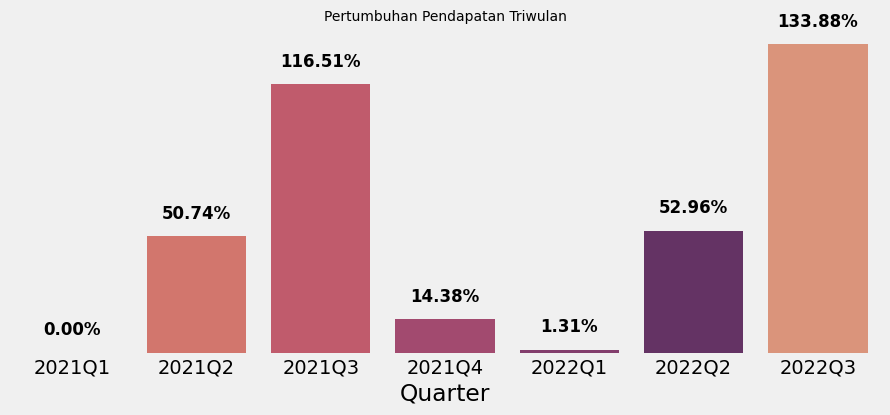

In [71]:
# Pertumbuhan Pendapatan per3bulan
rev_quarter = data.groupby(data['Quarter'])['Revenue'].sum()
rev_growth = (rev_quarter / rev_quarter.iloc[0] - 1) * 100

fig = plt.figure(figsize=(10, 4))
color = sns.color_palette('flare')
ax = sns.barplot(data=rev_growth.reset_index(), x='Quarter', y='Revenue', palette=color)

for i in ax.containers:
    ax.bar_label(i, padding=10, color='black', fontsize=12, label_type='edge',
                 fontweight='bold', fmt='%.2f%%')

plt.title('Pertumbuhan Pendapatan Triwulan', size=10)

ax.spines[['left', 'top', 'bottom']].set_visible(False)
ax.yaxis.set_visible(False)
# ax.xaxis.set_visible(False)

plt.show()

Pertumbuhan Pendapatan triwulan = pertumbuhan pendapatan dari pendapatan kuartal saat ini dikurangi dari kuartal sebelumnya. Itu sebabnya kuartal 1 bernilai 0% karena sebelumnya tidak ada nilai untuk membandingkan pertumbuhannya. Pertumbuhan pendapatan triwulanan untuk Q1 dan Q4 memerlukan bantuan ekstra untuk pulih!*italicised text*

In [50]:
# pendapatan perhari
profitable_menu = data.groupby('Week_day').sum(numeric_only=True)['Revenue'].sort_values(ascending=False)

fig = px.bar(profitable_menu,
             color=profitable_menu,
             color_continuous_scale=px.colors.sequential.YlGnBu)

fig.update_layout(margin=dict(t=70, b=10, l=20, r=20),
                  title='<b> Revenue by Day (2021 & 2022)', title_x = 0.5,
                  titlefont=dict(size=20),
                  xaxis_tickangle=-0,
                  yaxis = {'categoryorder':'total ascending'},
                  plot_bgcolor='white',
                  coloraxis_showscale=False)

fig.update_yaxes(showticklabels=True,
                 title='<b> Revenue')
fig.update_xaxes(title='<b> Day')
fig.update_traces(texttemplate='%{y}',
                  textposition='inside',
                  hovertemplate = '<b>%{x}</b><br>Revenue: %{y}')
fig.show()

**Dari grafik diatas Hari minggu dan sabtu  adalah yang paling menguntungkan, sedangkan hari kerja umumnya memiliki pendapatan yang hampir sama, kecuali hari Rabu.**

In [52]:
# Barang Paling Banyak Dibeli Berdasarkan Tanggal
fig = px.treemap(data_frame=data,
                path=[px.Constant('<b> Date in Each Year and Month'),
                      'Month',
                      'Day'],
                title = '<b> Most Purchased Items by Date (2021 & 2022)',
                values='Quantity')

fig.data[0].textinfo = 'label+text+value'
fig.update_traces(root_color='lightgrey')
fig.update_layout(treemapcolorway = ['Red', 'blue'],
                  margin = dict(t=70, b=10, l=20, r=20))
fig.layout.hovermode = False
fig.show()

Peningkatan volume penjualan pada bulan Juli dan Agustus *kemungkinan* terjadi karena adanya perayaan dua hari libur penting Perancis. Pada tanggal 14 Juli, Perancis memperingati Hari Bastille, dan pada tanggal 15 Agustus, Maria Diangkat ke Surga dirayakan. Perayaan ini kemungkinan besar berkontribusi terhadap penjualan yang lebih tinggi selama bulan-bulan ini.


In [53]:
#Distribusi hari waktu
fig = px.scatter(data, x='Quantity', y='Time', color='Day_time')
fig.update_layout(margin=dict(t=70, b=10, l=20, r=20),
                  title='<b> Day of Time (2021 & 2022)', title_x = 0.5,
                  titlefont=dict(size=20))
fig.show()

Waktu tersibuk untuk toko roti biasanya adalah di **pagi hari**, kemungkinan besar karena produk roti merupakan sarapan orang orang prancis. Jadi, permintaan pelanggan cenderung mencapai puncaknya pada jam-jam pagi ini

In [55]:
# Jm jam aktif
busy_hour = data.groupby('Time').sum(numeric_only=True)['Transaction_id'].sort_values(ascending=False)

fig = px.bar(busy_hour,
             color=busy_hour,
             color_continuous_scale=px.colors.sequential.dense,
             orientation='h')

fig.update_layout(margin=dict(t=60, b=10, l=20, r=20),
                  title='<b> Busiest Time (2021 & 2022)', title_x = 0.5,
                  titlefont=dict(size=20),
                  xaxis_tickangle=-0,
                  yaxis = {'categoryorder':'total ascending'},
                  plot_bgcolor='white',
                  coloraxis_showscale=False)

fig.update_yaxes(showticklabels=True,
                 title='<b> Time')
fig.update_xaxes(title='<b> Customer Transaction')
fig.update_traces(texttemplate='%{x}',
                  textposition='inside',
                  hovertemplate = '<b>%{x}</b><br> Transaction : %{x}')
fig.show()

Waktu tersibuk di Toko Roti adalah sekitar  pukul 11.00,  dan waktu paling tidak sibuk adalah sekitar  pukul 14.00.

In [63]:
# Rata-rata penjualan harian 2021
ads_2021 = data[(data['Quarter'] >= '2021Q1') & (data['Quarter'] <= '2021Q3')]\
          ['Revenue'].sum(numeric_only=True)/data['Date'].nunique()
print('Rata-rata penjualan harian 2021:', '€', '%.2f' % ads_2021)

# Rata-rata penjualan harian 2022
ads_2022 = data[(data['Quarter'] >= '2022Q1') & (data['Quarter'] <= '2022Q3')]\
          ['Revenue'].sum(numeric_only=True)/data['Date'].nunique()
print('Rata-rata penjualan harian 2022:', '€', '%.2f' % ads_2022)

Rata-rata penjualan harian 2021: € 409.39
Rata-rata penjualan harian 2022: € 427.71


In [62]:
# Rata-rata nilai transaksi 2021
atv_2021 = data[(data['Quarter'] >= '2021Q1') & (data['Quarter'] <= '2021Q3')]\
            ['Revenue'].sum(numeric_only=True)/data['Transaction_id'].nunique()
print('Rata-rata nilai transaksi 2021:', '€', '%.2f' % atv_2021)

# Rata-rata nilai transaksi 2022
atv_2022 = data[(data['Quarter'] >= '2022Q1') & (data['Quarter'] <= '2022Q3')]\
            ['Revenue'].sum(numeric_only=True)/data['Transaction_id'].nunique()
print('Rata-rata nilai transaksi 2022:', '€', '%.2f' % atv_2022)

Rata-rata nilai transaksi 2021: € 1.81
Rata-rata nilai transaksi 2022: € 1.89


In [66]:
# Pertumbuhan Pendapatan
pp_2021 = data[(data['Quarter'] >= '2021Q1') & (data['Quarter'] <= '2021Q3')]['Revenue'].sum(numeric_only=True)
pp_2022 = data[(data['Quarter'] >= '2022Q1') & (data['Quarter'] <= '2022Q3')]['Revenue'].sum(numeric_only=True)

pertumbuhan_pendapatan = (pp_2022 - pp_2021)/pp_2021*100
print(f'pertumbuhan_pendapatan:', '%.2f' % pertumbuhan_pendapatan,'%')

pertumbuhan_pendapatan: 4.47 %


Pertumbuhan pendapatan merupakan ukuran untuk melihat berapa persentase total pendapatan yang mengalami kenaikan atau penurunan dibandingkan tahun sebelumnya. Dalam hal ini, **tingkat pertumbuhan pendapatan toko roti meningkat sebesar 4,55%.**